# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План действий

1. Первым делом необходимо изучить данные, чтобы понять с какой информацией мы будем работать. В ходе изучения мы определим есть ли пропуски и дубликаты в данных

2. Во 2 шаге проведем корректировку значений, которые нашли в ходе общего изучения значений в 1 шаге

3. Следующим шагом проведем анализ рынка платформ, чтобы определить какие платформы потенциально прибыльны для компании.

4. 4-ым шагом проведем сегментацию рынка по регионам, чтобы определить какую кампанию вести в каждом регионе

5. Последним исследованием будет проверка гипотез

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [2]:
games = pd.read_csv('/datasets/games.csv')

games.info()
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*Уже видны пропуски*

*В дальнейшем следует изменить тип данных у столбцов "Year_of_release" (Int64), "Critic_Score" (Int64 (Критики скорее всего ставят целочисленные значения, так как там оценка идет от 0-100)), "User_Score" (float64)*

### Изучим следующие столбцы: "Название игр", "Платформы", "Жанры" и "Возрастной рейтинг"

In [3]:
#Количество игр
print('Кол-во игр: {}'.format(len(games['Name'].unique())))

Кол-во игр: 11560


*Что ж, логично, что есть дубликаты, так как игры выпускаются не под 1 платформу, если это только не эксклюзивы*

In [4]:
#Платформы
print('Пдатформы, на которые выпускались игры, и их кол-во')
print(games['Platform'].value_counts())

Пдатформы, на которые выпускались игры, и их кол-во
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [5]:
#Жанры
print('Жанры игр и их кол-во')
print(games['Genre'].value_counts())

Жанры игр и их кол-во
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


In [6]:
#Возрастной рейтинг
print('Возрастной рейтинг игр и их кол-во')
print(games['Rating'].value_counts())

Возрастной рейтинг игр и их кол-во
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


### Проверка на дубликаты и пропуски

In [7]:
print('Кол-во дубликатов: {}'.format(games.duplicated().sum()))
print()

print('Кол-во пропусков в столбцах')
print(games.isna().sum())

Кол-во дубликатов: 0

Кол-во пропусков в столбцах
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [8]:
#Также нам известно, что в столбце "Rating" есть аббревиатура 'tbd'
#'tbd' - (to be determined). Перевод, соответственно, такой: «будет утверждено» и «будет определено».
#Хотя с tbd следует быть внимательнее. У этого сокращения есть еще значения, но в данном контексте их знать не нужно.

print('Кол-во tbd-значений: {}'.format(len(games.query("User_Score == 'tbd'"))))

Кол-во tbd-значений: 2424


### Вывод

*Для работы с пропусками следовало бы вначале изучить эти пропуски во 2 шаге*

*Начальная проверка показала какие жанры, платформы и возрастные рейтинги пользуются популярностью*

*В дальнейних шагах изменим тип данных в 2-х столбцах: "Year_of_Release" (Int64) и "User_Score" (Float64)*

**Возможные причины пропусков**

*С tbd еще понятно, почему возник пропуск, но вот янвые пропуски могут возникнуть в следствии ряда причин:*
    - *Неудачный перенос данных, в ходе которой были утеряны некоторые значения*
    - *Возмошно произошел некий сбок из-за которого некоторые данные стерлисьЮ, ну или ошибка ответсвенного*
    - *Изначально не велся учет по определенным данным*
    - *и т.д.*

## Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [9]:
games.columns = map(str.lower, games.columns)
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Преобразуйте данные в нужные типы

In [10]:
#Преобразуем неявные пропуски `tbd` в NaN
tbd = games['user_score'] != 'tbd'
games['user_score'].where(tbd, np.nan, inplace=True)

In [11]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

#произошла ошибка из-за того, что присутствует текст "tbd", поэтому следует вначале заменить это значение на пропуск
games['user_score'] = games['user_score'].astype('float64') 

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработайте пропуски при необходимости

#### Пропуски в столбце "Название игры"

In [12]:
display(games[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Ага, пропуски с именем и жанром совпадают*

*Можно наблюдать "пустую картину". Да и платформа имеет малую популярность. От этих данных следует избавиться, т.к. сложно с чем-то сопоставить их и найти имена*

In [13]:
games.dropna(subset = ['name'], inplace = True)
games = games.reset_index(drop = True)
#games.info()
#display(games.isnull().sum())

#### Пропуски в столбце "Год выпуска игры"

In [14]:
display(games[games['year_of_release'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*Мы знаем, что есть дубликаты с названием игр из-за того, что они выпускались на несколько платформ. Поэтому пропущенные года можно заполнить относительно выхода дубликата игры на другие платформы. Хотя есть вероятность того, что раньше игра была эксклюзивом, а после перестала ею быть и вышла на другие платформы в поздних годах, Но данной теорией в этой задаче думаю можно пренебречь и заменить на одинаковые года*

In [15]:
#Проверим игру на наличие нескольких платформ
display(games.query('name == "Madden NFL 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
1880,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92,8.3,E
3888,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94,7.7,E
5707,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70,6.6,E


*Ну все, можно приступать к замене пропусков относительно выхода дубликатов игры на другие платформы*

In [16]:
games['year'] = games['name'].map(games.groupby('name')['year_of_release'].first())
games['year_of_release'] = games['year']
games = games.drop('year', axis=1)

In [17]:
print(len(games[games['year_of_release'].isnull()]))

146


*Не все получилось исправить. Остальные пропуски пока что оставим, так как нет возможности за что-то "зацепиться" и заполнить их*

#### Пропуски в столбце "critic_score"

*На примере игры "Madden NFL 2004" можно наблюдать разброс оценок в зависимости от платформы (для GBA поставили очень низкую оценку по сравнению с другими платформами). Поэтому искать медиану или среднее, как по мне, не стоит, так как есть вероятность сбить распределение*

#### Пропуски в столбце "user_score"

*Аналогично как и с "critic_score"*

#### Пропуски в столбце "rating"

*Наврятли у дубликатов игр на разных консолях будут разные рейтинги. Попробуем заполнить пропуски как делали с годами*

**Возможные причины пропусков в оценках от критиков, пользователей и рейтинга**
    - *Отсутствие оценки у критиков и пользователей скорее всего связана из-за технических ошибок или ошибки ответственного за учет или передачу данных. Также есть вероятность, что игра могла и не дойти до оценки критиков и пользователей. Например никому не известные инды-игры*
    - *С рейтингом ситуация такие ситуации тоже возможны*

In [18]:
games['ratings'] = games['name'].map(games.groupby('name')['rating'].first())
games['rating'] = games['ratings']
games = games.drop('ratings', axis=1)

print(len(games[games['rating'].isnull()]))

6327


*Заполнили пропуски, которые получилось исправить, остальные следует оставить*

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

*Пропуски были исправлены, где это было возможно и необходимо. В остальных случаев пропуски остались и данные не удалялись, дабы не повлиять на анализ*
*Необходимые данные были приведены к нужному типу*
*Был добавлен столбец с глобальными продажами*

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [20]:
games_per_year = games[['name', 'year_of_release']].drop_duplicates().pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values('year_of_release', ascending=False)
games_per_year.columns = ['Кол-во игр']
display(games_per_year.head())

,Кол-во игр
year_of_release,
2016,279
2015,331
2014,279
2013,293
2012,406


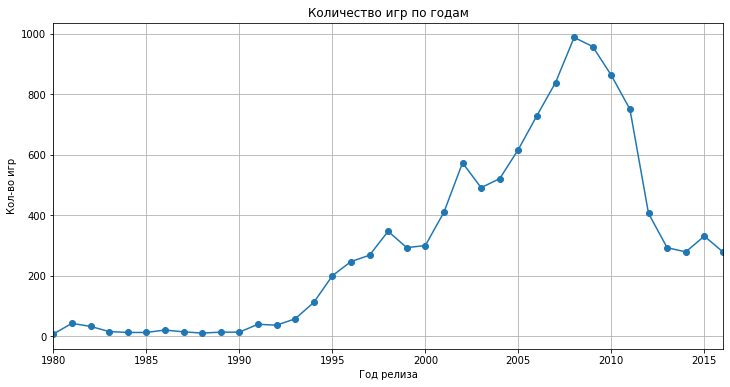

In [21]:
games_per_year.plot(title='Количество игр по годам', style = 'o-', grid = True, legend = False, figsize=(12, 6)).set(xlabel = 'Год релиза', ylabel = 'Кол-во игр')

plt.show()

*Видно, что скачок произошел уже после 90-х годов. Интересно почему после 2008-го произошло падение, наврятли из-за перенасыщенности рынка. Как вариант люди начали пользоваться торрентами :D, ну или мобильный гейминг*

*Касательно важности всех данных, то тут предлагаю не рассматривать данные до 90-х годов, так как они идут очень ровно и имеют малые значения*

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

[Text(0, 0.5, 'Кол-во проданных игр'), Text(0.5, 0, 'Название платформы')]

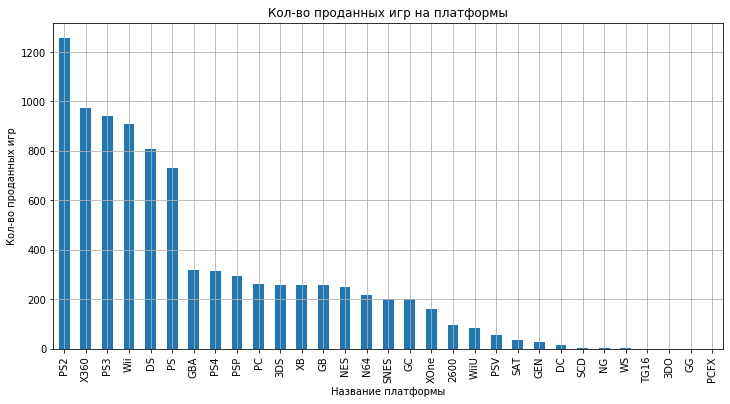

In [22]:
platform_sales = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
platform_sales.plot(y = 'total_sales', kind = 'bar', legend = False, title = 'Кол-во проданных игр на платформы', grid = True, figsize = (12, 6)).set(xlabel = 'Название платформы', ylabel = 'Кол-во проданных игр')

*Возьмем топ6 платформ с наибольшими суммарными продажами (Думаю стоит включить в топ платформу PS, так как уже только после этой платформы наблюдаются малые продажи. Но это не значит, что остальные платформы не популюрны, некоторые из них просто вышли относительно недавно, поэтому их продажи не высоки*

In [23]:
top6_sales_based_on_platforms = platform_sales.head(6)
print(top6_sales_based_on_platforms)

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86


In [24]:
def yearly_total_sales_by_platform(name, df):
    '''
    Глобальные продажи по платформе по годам
    '''
    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

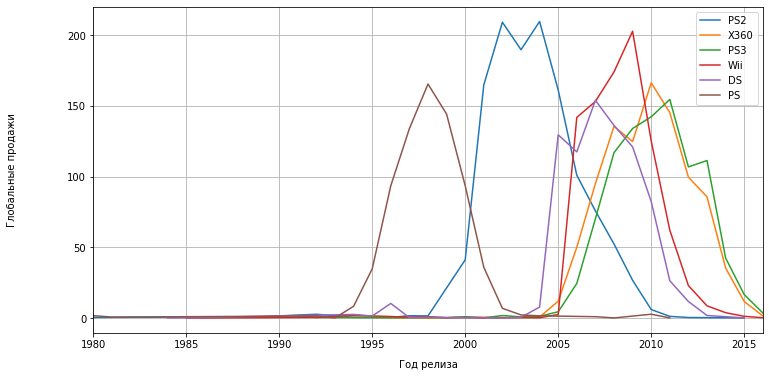

In [25]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top6_sales_based_on_platforms.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(grid = True, figsize=(12, 6), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

*По графику мы видем, что в среднем жизненый цикл платформ составляет 10 лет. Поэтому можно утверждать, что за 10 лет появляются новые и исчезают старые платформы. Рост платформ также может быть связан не только из-за эсклюзивов, но и из-за выхода платформы новой модели или серии, в то время как на старые модели цены будут снижаться как и на саму модель, так и на игру (поэтому рост возможен из-за снижения цен)*

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

#### Не учитывайте в работе данные за предыдущие годы.

*Мы определились с жизненным циклом платформ в среднем (10 лет), но так как в задаче требуют взять актуальный период для прогноза на следующий год без учета предыдущих годов, то я бы порекомендовал брать не только 2016, но и хотя бы включить 2015 год, чтобы в анализ попали чуть побольше данных*

In [27]:
actual_period = (games['year_of_release'] > 2014) & (games['year_of_release'] <= 2016)
actual_games = games.loc[actual_period]

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

[Text(0, 0.5, 'Кол-во проданных игр'), Text(0.5, 0, 'Название платформы')]

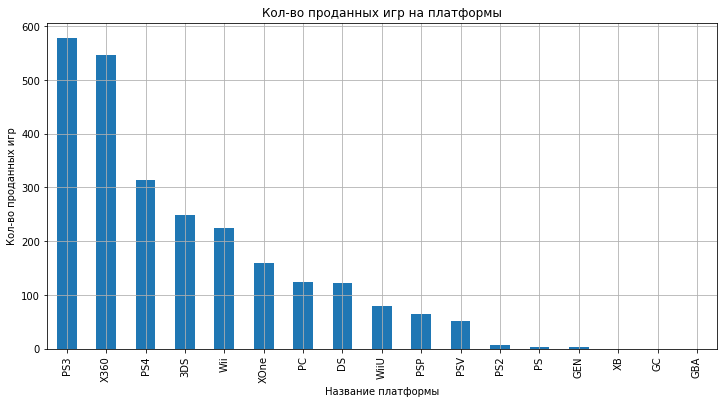

In [28]:
#Возьмем данные за 6 лет
six_years = (games['year_of_release'] > 2009) & (games['year_of_release'] <= 2016)
six_years_games = games.loc[six_years]

total_sales_for_6_years = six_years_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
total_sales_for_6_years.plot(y = 'total_sales', kind = 'bar', legend = False, title = 'Кол-во проданных игр на платформы', grid = True, figsize = (12, 6)).set(xlabel = 'Название платформы', ylabel = 'Кол-во проданных игр')

**Какие платформы лидируют по продажам**

*По гистограмме видно, что сильно лидурет PS3, после идет X360, дальше бронзовое место занимает продукт от Сони PS4, но с большим отрывом от серебрера*

In [29]:
print(total_sales_for_6_years)

          total_sales
platform             
PS3            577.75
X360           545.50
PS4            313.39
3DS            249.40
Wii            224.05
XOne           159.23
PC             124.33
DS             122.26
WiiU            80.12
PSP             63.62
PSV             51.74
PS2              7.52
PS               2.71
GEN              2.67
XB               0.10
GC               0.05
GBA              0.04


**Какие платформы растут или падалают**

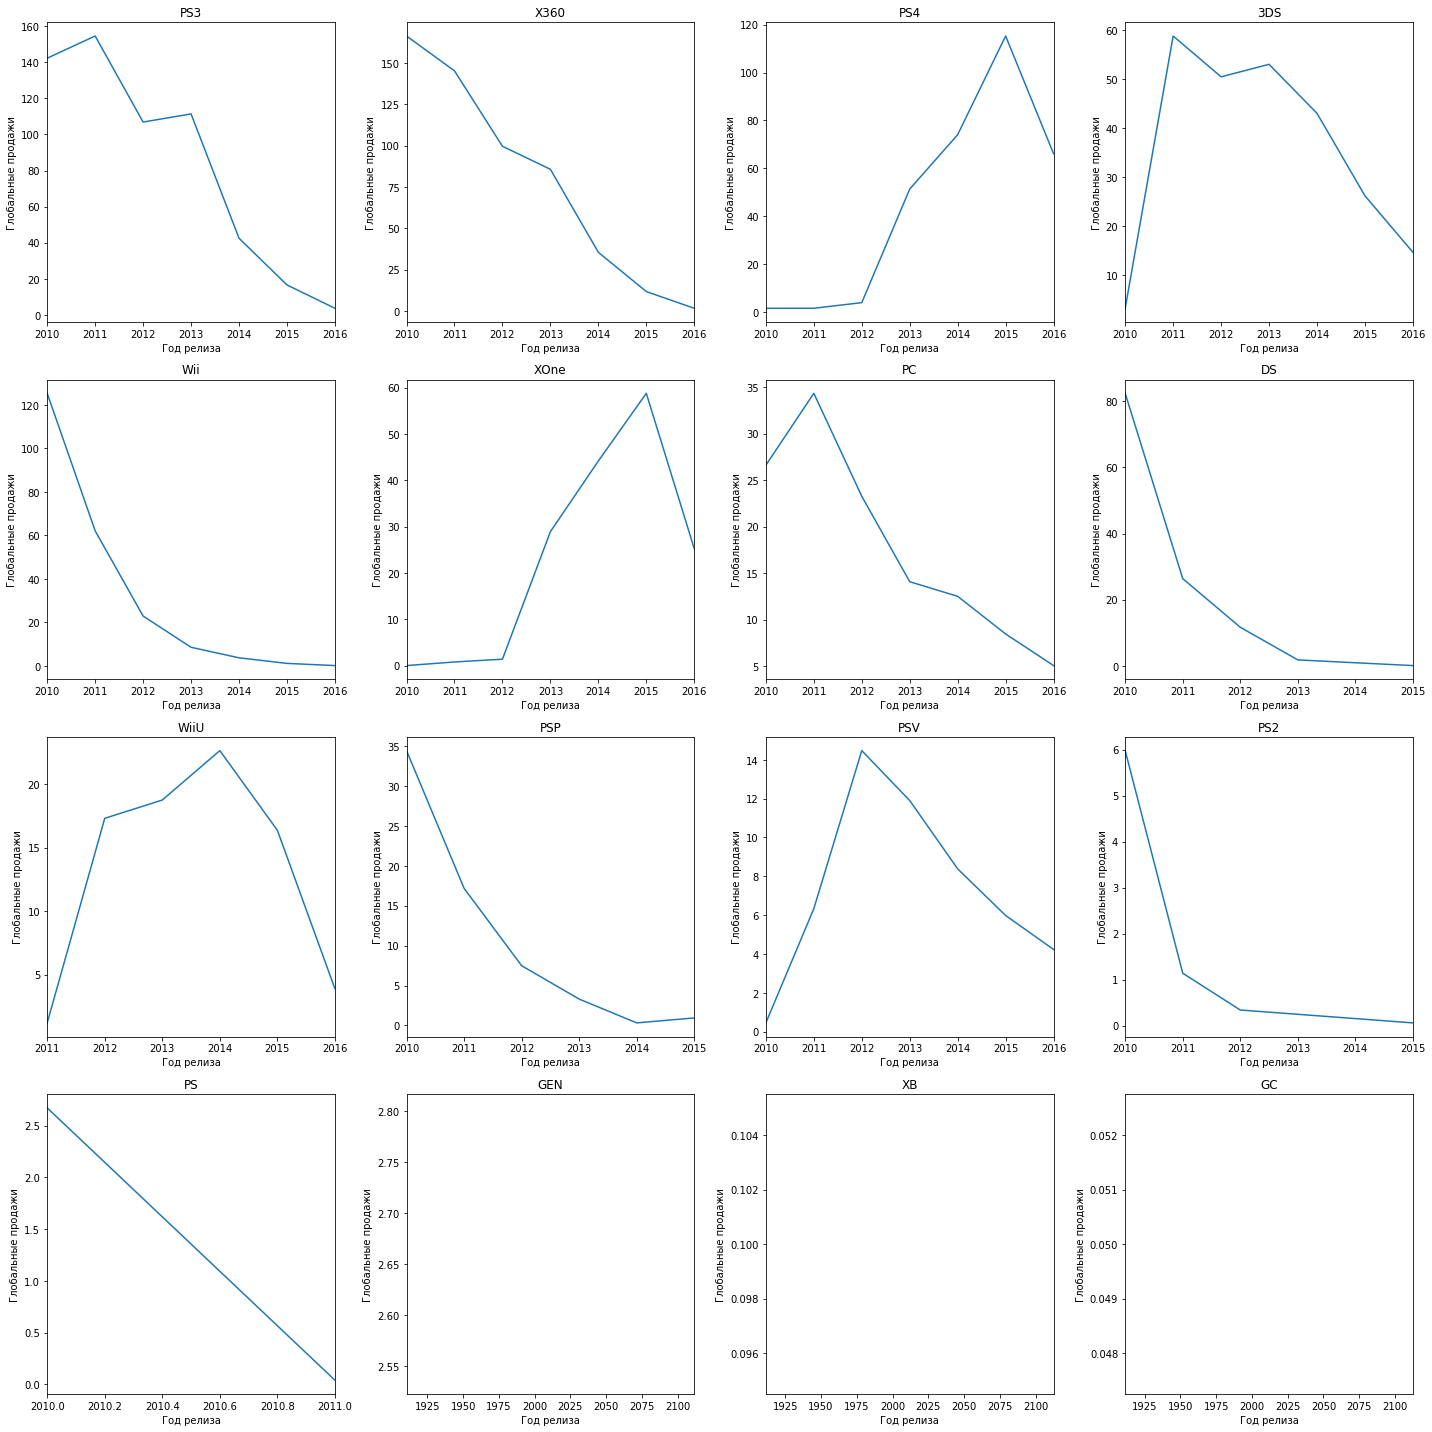

In [30]:
import warnings
warnings.filterwarnings('ignore')

# список платформ за 6 лет
platforms = list(total_sales_for_6_years.index)

# добавим ряды и столбцы
rows = 4
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, six_years_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

*По графику видно, что все платформы идут на спад. За 2010-2016 года только у ПС3 есть 577 млн проданных копий игр, на втором месте Xbox One, у которой 545 млн проданных копий игр. платформы GEN, XB, GS так вообще не показаны, так как на их платформы продажи игр очень маленькие*

*Потенциально прибыльные выбрать сложно, так как идет спад, но есть вероятность, что PS4 снова поднимется на маленький промежуток, так как ожидается наплыл эксклюзивов на данную платформу. Также возможно, что и продукт от Майкрософта будет потенциально прибальным с их мощным железом. Возможно повторится история, что золото займет продукт от Сони, а серебро Майкросфот*

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

*Все платформы я брать не буду, а возьму платформы из топ5 за актуальный период*

[Text(0, 0.5, 'Кол-во проданных игр'), Text(0.5, 0, 'Название платформы')]

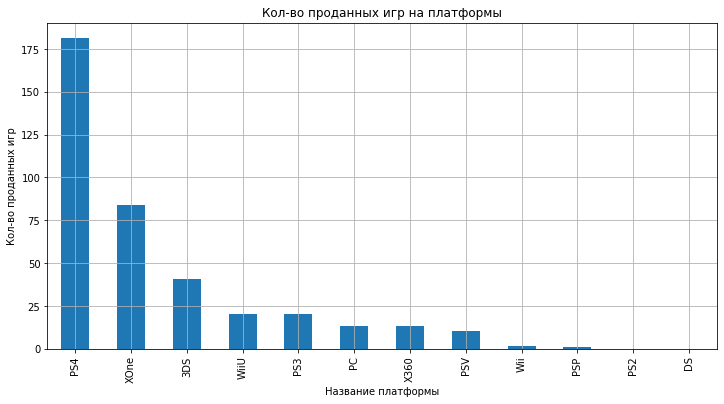

In [32]:
total_sales_for_actual_period = actual_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
total_sales_for_actual_period.plot(y = 'total_sales', kind = 'bar', legend = False, title = 'Кол-во проданных игр на платформы', grid = True, figsize = (12, 6)).set(xlabel = 'Название платформы', ylabel = 'Кол-во проданных игр')

Среднее значение глобальных продаж игр для PS4: 90.66000000000005
Среднее значение глобальных продаж игр для XOne: 41.99500000000002
Среднее значение глобальных продаж игр для 3DS: 20.384999999999994
Среднее значение глобальных продаж игр для WiiU: 10.125000000000005
Среднее значение глобальных продаж игр для PS3: 10.075000000000003


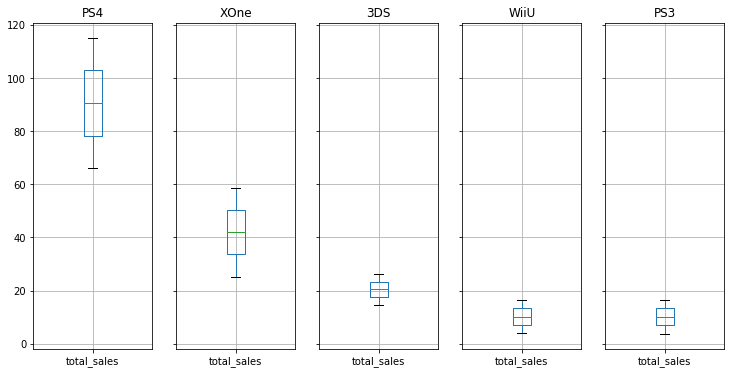

In [33]:
promising_platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']

fig, axs = plt.subplots(1, 5, sharey=True, figsize = (12, 6))

for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)


plt.subplots_adjust(left=0.1)
plt.show()

*Можно наблюдать, что в среднем сумма глобальных продаж игр за актуальный период на ПС4 в 2 раза больше, чем у его конкурента XOne. В свою очередь у XOne продаж тоже в 2 раза больше, чем у Нинтендо. Нинтендо и ПС3 держутся на одном уровне*

*ПС4 явно выглядит намного конкурентоспособней, чем остальные продукты*

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

*В нашем случае самой популярной платформой будет ПС4*

In [34]:
platform_PS4 = actual_games.query("platform == 'PS4'")
platform_PS4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.535364,-0.061278
critic_score,0.535364,1.000000,0.395956
total_sales,-0.061278,0.395956,1.000000


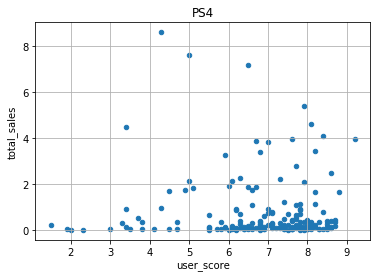

In [35]:
#Для наглядности посмотрим разброс по оценкам пользователей
platform_PS4.plot(x='user_score', y='total_sales', kind='scatter', grid = True, title='PS4')

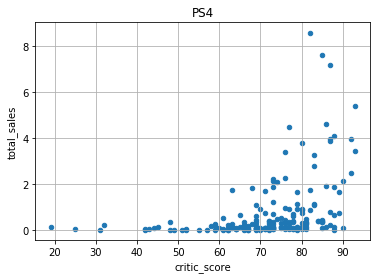

In [36]:
#Для наглядности посмотрим разброс по оценкам критиков
platform_PS4.plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title='PS4')

*Резульат показал:*
 - 1. *Взаимосвязи между оценкой пользователей и продажами нет*
 - 2. *Взаимосвязь между оценкой критиков и продажами есть, но она очень маленькая*
 - 3. *Интересный момент, взаимосвязь между критиками и пользователями присутствует и она больше, чем взаимосвязь с продажами*

#### Соотнесите выводы с продажами игр на других платформах

*Сравним предыдущие результаты с конкурентом (XOne)*

In [37]:
platform_XOne = actual_games.query("platform == 'XOne'")
platform_XOne[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.459479,-0.036921
critic_score,0.459479,1.000000,0.428183
total_sales,-0.036921,0.428183,1.000000


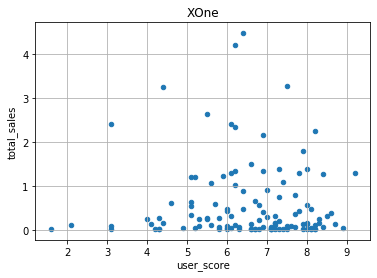

In [38]:
#Для наглядности посмотрим разброс по оценкам пользователей
platform_XOne.plot(x='user_score', y='total_sales', kind='scatter', grid = True, title='XOne')

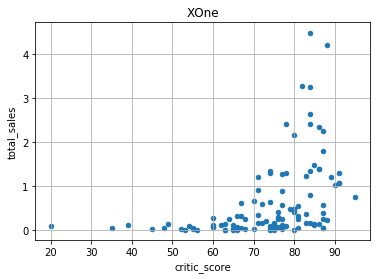

In [39]:
#Для наглядности посмотрим разброс по оценкам критиков
platform_XOne.plot(x='critic_score', y='total_sales', kind='scatter', grid = True, title='XOne')

*Резульат показал:*
 - 1. *Взаимосвязи между оценкой пользователей и продажами нет*
 - 2. *Взаимосвязь между оценкой критиков и продажами есть, но она очень маленькая. Но, если сравнивать с ПС4, то она будет больше*
 - 3. *Интересный момент, взаимосвязь между критиками и пользователями присутствует и она почти равна взаимосвязи с продажами. Если сравнивать с ПС4, то взаимосвязь здесь поменьше*

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

[Text(0, 0.5, 'Глобальные продажи'), Text(0.5, 0, 'Жанр')]

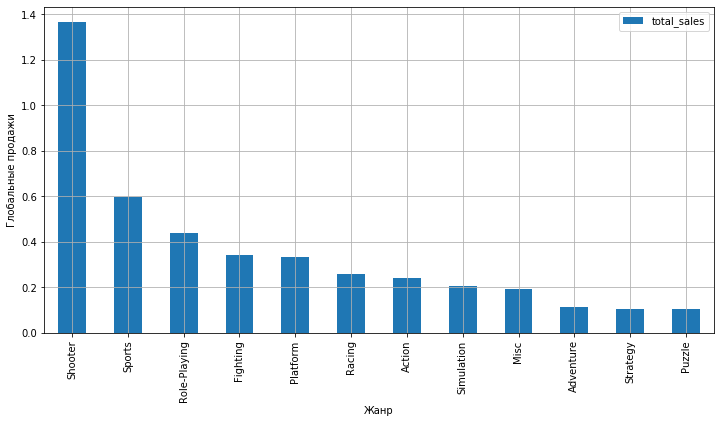

In [40]:
genre_sales_for_actual_period = actual_games.pivot_table(index = 'genre', values = 'total_sales').sort_values('total_sales', ascending = False)
genre_sales_for_actual_period.plot(y = 'total_sales', kind = 'bar', grid = True, figsize = (12, 6)).set(xlabel='Жанр', ylabel='Глобальные продажи')

*Самым популярным жанром является шутер, после идут спортивные и ролевые игры*

*Непопулярные жанры: приключения, стратегии и пазлы*

*Диаграмму построили относительно всего мира, но если взять в разрез каждый регион по отдельности, то думаю картина поменяется, ведь например японцы больше любят файтинги и слешеры, где есть нотка приключений*

### Вывод

*Результат показал, что из года в год идет смена популярности платформ.*

*В среднем жизненый цикл платформы составляет 10 лет*

*Если за весь срок популярной платфорой был PS2, а вторым X360, то в актуальном периоде эти платформы сменились: самой популярной стал PS4, а на втором месте - XOne. Sony и Microsoft не сдают позиции*

*В актуальное время идет спад всех платформ, которые попали в срез. Это говорит о том, что скоро мир ожидает новые платформы*

*В актуальном период популярным жанром является - шутер*

## Шаг 4. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
 - 1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - 2. Самые популярные жанры (топ-5). Поясните разницу.
 - 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

*Так как мы понимаем, что будем рисовать одинаковой стилистики диаграммы для каждого регоина, то следует упростить задачу написанием функции, выполняющей данную работу*

#### Самые популярные платформы (топ-5)

In [41]:
def sales_by_region(df):
    df.plot(y = region, kind = 'bar', grid = True, figsize = (12, 6), title = region, legend = False).set(ylabel = 'Продажи игр на платформу')
    
    plt.xticks(rotation=0)
    plt.show()

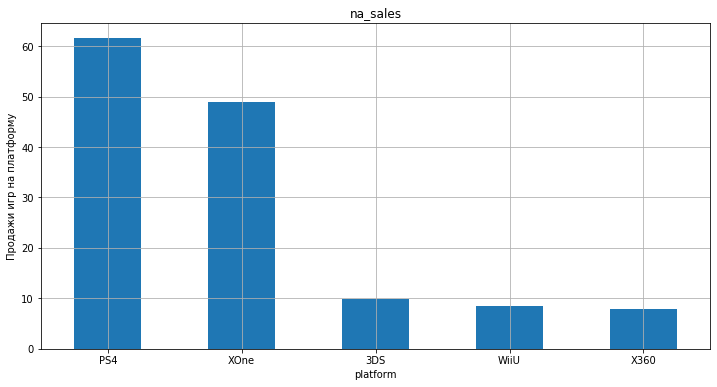

In [42]:
#Популярные платформ в Северной Америке
region = 'na_sales'
column = 'platform'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

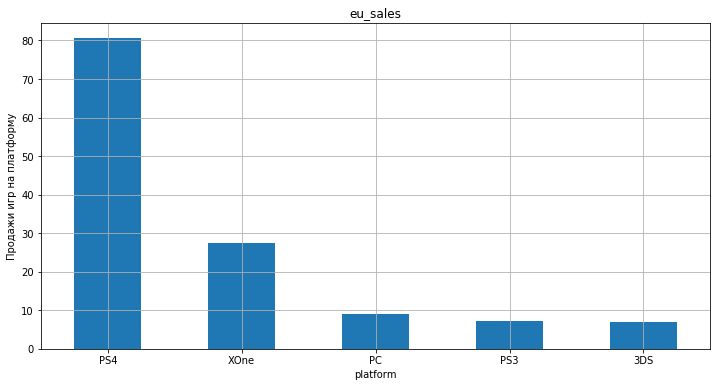

In [43]:
#Популярные платформ в Европе
region = 'eu_sales'
column = 'platform'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

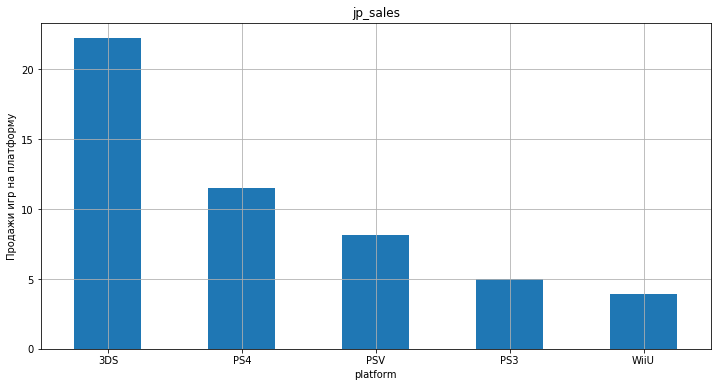

In [44]:
#Популярные платформ в Японии
region = 'jp_sales'
column = 'platform'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

*Результат показал:*
 - *В Северной Америке популярной платформой за актуальный период является - ПС4, после идет XOne (Майкрософт скорее старается держаться в нише за счет своих привликательных подписок, которые дают возможность не покупать игры, а играть в них за счет предоставленных возможностей подписки). Также можно заметить, что в Северной Америке в топ 5 не попадают любители ПК-гейминга D:*
 - *В Европе же очень большую долю занимают любители PS4, XOne также стоит на 2 месте. Кстати, здесь уже наблюдаются ПК-бояры :D*
 - *Не удивлен, что в Японии любят больше всего Нинтендо (Всякие слешеры, да марио)))*

#### Самые популярные жанры (топ-5)

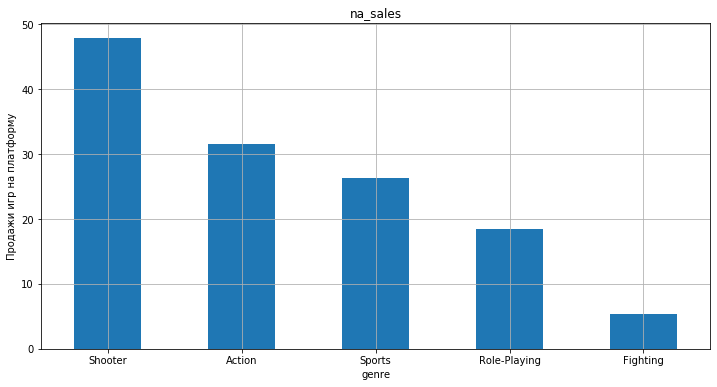

In [45]:
#Популярные жанров в Северной Америке
region = 'na_sales'
column = 'genre'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

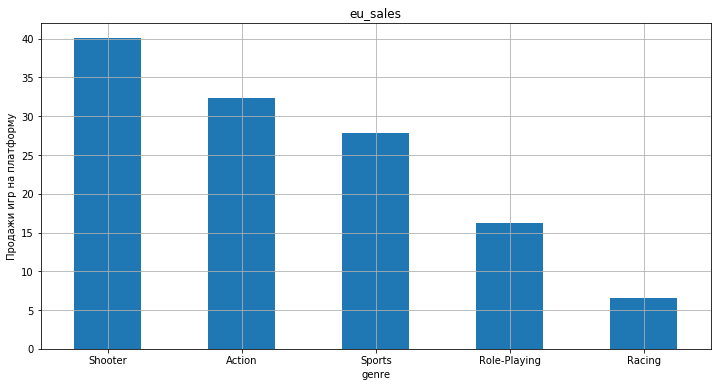

In [46]:
#Популярные жанров в Европе
region = 'eu_sales'
column = 'genre'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

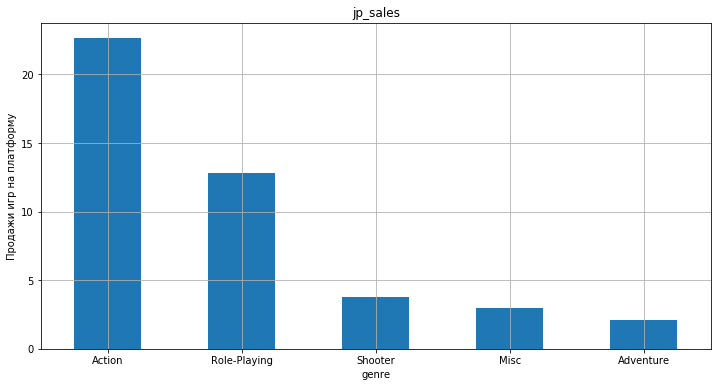

In [47]:
#Популярные жанров в Японии
region = 'jp_sales'
column = 'genre'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

*Результат показал:*
 - *Что ж, Северная Америка показала предвидемый результат. На первом месте шутер, после идет экшн и спорт. Почему результат был очевиден? Это можно наблюдать на стриминнговых площадках как twitch и mixer. Там примерно такие жанры и популярны, если брать регион "Северная Америка" или американских стримеров*
 - *В Европу +/- такая же ситуация, за исключением того, что вместо файтинга, они предпочитают гонки*
 - *51% преобладает у жанра экшн в Японии) Как и было подмечено, Японцы любят всякие слешеры, бродилки, захватывающие игры*

*Я вроде подметил. У японцев эстетика прекрасного очень интересная :D. Как человек, который читает манги, ранобе, а также играет в игры от konami и bandai namco могу смело утвержрать, что вкусы здесь сильно будут отличаться от общего вкуса в мире)*

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [48]:
#Чтобы учеть также игры и без рейтинга, давайте создадим столбец, где пропуска заполнем каким-либо значением
actual_games['filled_rating'] = actual_games['rating'].fillna('unknown')

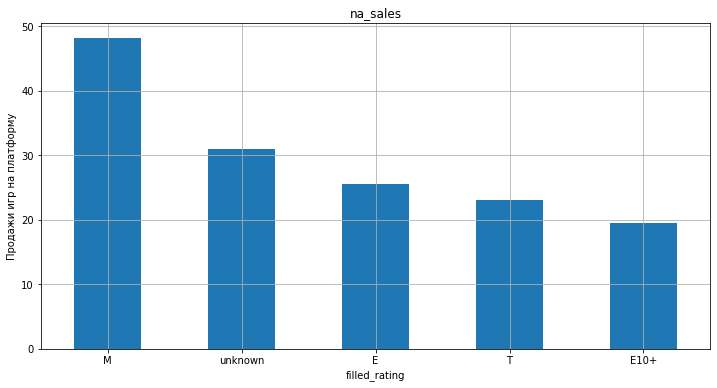

In [49]:
#Популярные рейтинги игр в Северной Америке
region = 'na_sales'
column = 'filled_rating'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

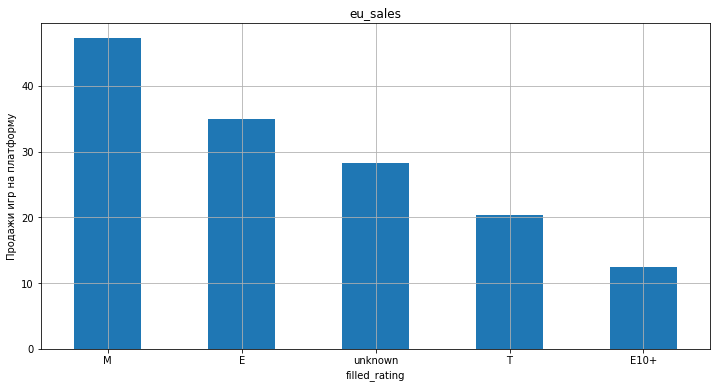

In [50]:
#Популярные рейтинги игр в Европу
region = 'eu_sales'
column = 'filled_rating'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

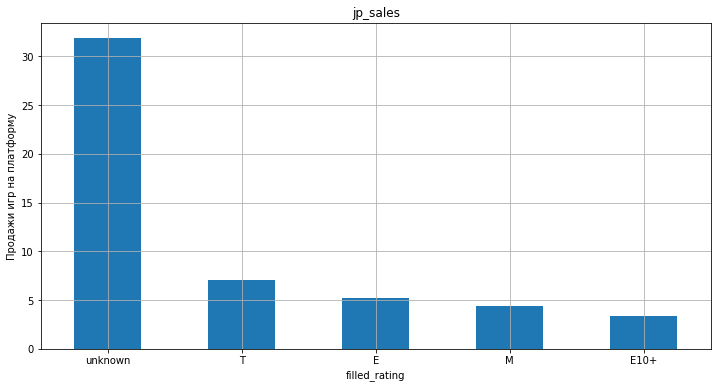

In [51]:
#Популярные рейтинги игр в Японии
region = 'jp_sales'
column = 'filled_rating'
sales_by_region(actual_games.pivot_table(index = column, values = region, aggfunc = 'sum').sort_values(region, ascending = False).head(5))

*Результат показал:*
 - *В Северной Америке преобладает рейтинг М или же для тех кому 17+, далее следует комбинация игр, где рейтинг не учтен. Наврятли это 1 и тот же рейтинг, скорее комбинация многих. Бронзовое место принадлежит играм с рейтингом Е*
 - *В Европе также лидиром являются игры с рейтингом М, второе место у игр с рейтингом Е, а бронза у безымянного*
 - *А вот и веселая Япония, тут преобладает неизвестный нам рейтинг, после идут игры с рейтинг Т и Е*
 - *Скорее всего японские гейм-девелоперы штамповали игры как конвееры и они еще даже не прошли или им не дали возрастное ограничение*
 - *Интересно, что рейтинги Е10+ не меняли свои места в независимости от региона*

### Вывод

*Результат показал:*
 - *В Северной Америке популярной платформой за актуальный период является - ПС4, после идет XOne (Майкрософт скорее старается держаться в нише за счет своих привликательных подписок, которые дают возможность не покупать игры, а играть в них за счет предоставленных возможностей подписки). Также можно заметить, что в Северной Америке в топ 5 не попадают любители ПК-гейминга D:*
 - *В Европе же очень большую долю занимают любители PS4, XOne также стоит на 2 месте. Кстати, здесь уже наблюдаются ПК-бояры :D*
 - *Не удивлен, что в Японии любят больше всего Нинтендо (Всякие слешеры, да марио)))*
 - *Северная Америка показала предвидемый результат относительно жанров. На первом месте шутер, после идет экшн и спорт. Почему результат был очевиден? Это можно наблюдать на стриминнговых площадках как twitch и mixer. Там примерно такие жанры и популярны, если брать регион "Северная Америка" или американских стримеров*
 - *В Европу +/- такая же ситуация, за исключением того, что вместо файтинга, они предпочитают гонки*
 - *51% преобладает у жанра экшн в Японии) Как и было подмечено, Японцы любят всякие слешеры, бродилки, захватывающие игры*
 - *В Северной Америке преобладает рейтинг М или же для тех кому 17+, далее следует комбинация игр, где рейтинг не учтен. Наврятли это 1 и тот же рейтинг, скорее комбинация многих. Бронзовое место принадлежит играм с рейтингом Е*
 - *В Европе также лидиром являются игры с рейтингом М, второе место у игр с рейтингом Е, а бронза у безымянного*
 - *А вот и веселая Япония, тут преобладает неизвестный нам рейтинг, после идут игры с рейтинг Т и Е*
 - *Скорее всего японские гейм-девелоперы штамповали игры как конвееры и они еще даже не прошли или им не дали возрастное ограничение*
 - *Интересно, что рейтинги Е10+ не меняли свои места в независимости от региона*

## Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [52]:
platform_PC = actual_games.query('platform == "PC"')
print('Средная оценка пользователей для XOne: {}'.format(platform_XOne['user_score'].mean()))
print('Средная оценка пользователей для PC: {}'.format(platform_PC['user_score'].mean()))

Средная оценка пользователей для XOne: 6.532203389830508
Средная оценка пользователей для PC: 6.266666666666667


**Нулевая гипотеза:**
    - *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

**Альтернативная гипотеза:**
    - *Средние пользовательские рейтинги платформ Xbox One и PC различаются*

*Пороговое значение alpha зададим 0.05 (5%)*

In [53]:
print(platform_XOne['user_score'].var())
print(platform_PC['user_score'].var())

2.1300651890482394
3.0829718875502015


In [54]:
alpha = .05

results = st.ttest_ind(platform_XOne['user_score'], platform_PC['user_score'], equal_var = False, nan_policy = 'omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2581819059420656
Не получилось отвергнуть нулевую гипотезу


*Что ж, хоть у нас в сравнении 2 различные платформы, но результат показал, что средние пользовательские рейтинги платформ XOne и PC все же одинаковые. Лишь в 3% случаев может быть различие, что крайне маловероятен*

*Таким образом гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергаем*

*p-value получили равным ~25,8%. Если бы рейтинги пользователей НЕ отличались (наша нулевая гипотеза), то те различия, что мы фактически видим, могли бы получиться случайно лишь в 25,8% случаев*

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [55]:
action_games = actual_games.query('genre == "Action"')
sports_games = actual_games.query('genre == "Sports"')

print('Средная оценка пользователей для экшн игр: {}'.format(action_games['user_score'].mean()))
print('Средная оценка пользователей для спортивных игр: {}'.format(sports_games['user_score'].mean()))

Средная оценка пользователей для экшн игр: 6.793956043956044
Средная оценка пользователей для спортивных игр: 5.219277108433735


**Нулевая гипотеза:**
    - *Средние пользовательские рейтинги жанров Action и Sports одинаковые*

**Альтернативная гипотеза:**
    - *Средние пользовательские рейтинги жанров Action и Sports различаются*

*Пороговое значение alpha зададим 0.05 (5%)*

In [56]:
print(np.var(action_games['user_score'], ddof=1))
print(np.var(sports_games['user_score'], ddof=1))

1.8730571914273573
3.8601116661769033


*Мы рассматриваем две генеральные сопокупности – игры разных жанров*
*Есть основание полагать, что выборки взяты из схожих по параметрам совокупностей, поэтому за equal_var оставим True*

In [57]:
alpha = .05

results = st.ttest_ind(action_games['user_score'], sports_games['user_score'], nan_policy = 'omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.111531211716706e-13
Отвергаем нулевую гипотезу


*Средние пользовательские рейтинги различаются, и нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится*

*Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные не отвергаем*

## Шаг 6. Напишите общий вывод

1. **Шаг 1. Откройте файл с данными и изучите общую информацию.**
 - *Начальная проверка показала какие жанры, платформы и возрастные рейтинги пользуются популярностью*
 - *Исправление пропусков оставили на 2-ой шаг, чтобы изучить природу пропусков и посмотреть, что с ними можно сделать*

2. **Шаг 2. Подготовьте данные**
 - *Подготовка данных прошла успешно*

3. **Шаг 3. Проведите исследовательский анализ данных**
    - 1. *Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*
        - *Результат показал, что скачок произошел уже после 90-х годов. Интересно почему после 2008-го произошло падение, наврятли из-за перенасыщенности рынка. Как вариант люди начали пользоваться торрентами :D*
        - *Касательно важности всех данных, то тут было предложено не рассматривать данные до 90-х годов, так как они идут очень ровно и имеют малые значения*
    - 2. *Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*
        - *Результат дал понять, что в среднем жизненый цикл платформ составляет 10 лет. Поэтому можно утверждать, что за 10 лет появляются новые и исчезают старые платформы. Рост платформ также может быть связан не только из-за эсклюзивов, но и из-за выхода платформы новой модели или серии, в то время как на старые модели цены будут снижаться как и на саму модель, так и на игру (поэтому рост возможен из-за снижения цен)*
    - 3. *Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.*
        - *Мы определились с жизненным циклом платформ в среднем (10 лет), но так как в задаче требуют взять актуальный период для прогноза на следующий год без учета предыдущих годов, то я бы порекомендовал брать не только 2016, но и хотя бы включить 2015 год, чтобы в анализ попали чуть побольше данных**
    - 4. *Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*
        - 1. *Какие платформы лидируют по продажам*
            - *Гистограмма показала, что сильно лидурет PS4 (с их эксклюзивами, очевидно), после идет Xbox One, но с большим отрывов*
        - 2. *Какие платформы растут или падалают*
            - *По графику видно, что все платформы идут на спад. За 2015-2016 года только у ПС4 есть 181 млн проданных копий игр, на втором месте Xbox One, у которой 84 млн проданных копий игр. платформы PSP, PS2, DS так вообще не показаны, так как на их платформы продажи игр очень маленькие*
            - *Потенциально прибыльные выбрать сложно, так как идет сильный спад, но есть вероятность, что PS4 снова поднимется на маленький промежуток, так как скоро выходит PS5, что в свою очередь снизит цены на старую серию, и люди начнут скупать PS4, а также игры на нее, чтобы погрузиться в атмосферу эпичных игр, как: Last of us, bloodborne, God of war и т.д.*
            - *Наврятли такое могу сказать про Xbox One, так как у майкрософта особо нет хороших и атмосферных эксклюзивов, кроме форзы 4((( Поэтому выбрать ее потенциально прибыльной платформой я не могу*
    - 5. *Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.*
        - *Можно наблюдать, что в среднем сумма глобальных продаж игр за актуальный период на ПС4 в 2 раза больше, чем у его конкурента XOne*
    - 6. *Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*
        - 1. *Взаимосвязи между оценкой пользователей и продажами нет*
        - 2. *Взаимосвязь между оценкой критиков и продажами есть, но она очень маленькая*
        - 3. *Интересный момент, взаимосвязь между критиками и пользователями присутствует и она больше, чем взаимосвязь с продажами**
    - 7. *Соотнесите выводы с продажами игр на других платформах*
        - 1. *Взаимосвязи между оценкой пользователей и продажами нет*
        - 2. *Взаимосвязь между оценкой критиков и продажами есть, но она очень маленькая. Но, если сравнивать с ПС4, то она будет больше*
        - 3. *Интересный момент, взаимосвязь между критиками и пользователями присутствует и она почти равна взаимосвязи с продажами. Если сравнивать с ПС4, то взаимосвязь здесь поменьше*
    - 8. *Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*
        - *Самым популярным жанром является шутер, после идут спортивные и ролевые игры*
        - *Непопулярные жанры: приключения, стратегии и пазлы*
        - *Диаграмму построили относительно всего мира, но если взять в разрез каждый регион по отдельности, то думаю картина поменяется, ведь например японцы больше любят файтинги и слешеры, где есть нотка приключений**          
            
4. **Шаг 4. Составьте портрет пользователя каждого региона**
    - *Определите для пользователя каждого региона (NA, EU, JP):
        - 1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
            - *В Северной Америке популярной платформой за актуальный период является - ПС4, после идет XOne (Майкрософт скорее старается держаться в нише за счет своих привликательных подписок, которые дают возможность не покупать игры, а играть в них за счет предоставленных возможностей подписки). Также можно заметить, что в Северной Америке в топ 5 не попадают любители ПК-гейминга D:*
            - *В Европе же очень большую долю занимают любители PS4, XOne также стоит на 2 месте. Кстати, здесь уже наблюдаются ПК-бояры :D*
            - *Не удивлен, что в Японии любят больше всего Нинтендо (Всякие слешеры, да марио)))*
        - 2. Самые популярные жанры (топ-5). Поясните разницу.
            - *Что ж, Северная Америка показала предвидемый результат. На первом месте шутер, после идет экшн и спорт. Почему результат был очевиден? Это можно наблюдать на стриминнговых площадках как twitch и mixer. Там примерно такие жанры и популярны, если брать регион "Северная Америка" или американских стримеров*
            - *В Европу +/- такая же ситуация, за исключением того, что вместо файтинга, они предпочитают гонки*
            - *51% преобладает у жанра экшн в Японии) Как и было подмечено, Японцы любят всякие слешеры, бродилки, захватывающие игры*
        - 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
            - *В Северной Америке и Европе ситуация связанная с рейтингом +/- одинаковая. Преобладает рейтинг М или же для тех кому 17+. А дальше интереснее, у Америке рейтинги Е, Т и Е10+ не сильно разнятся между собой, но вот в Европе рейтинг Е (или же для всех от слова everyone) занимет большую долю, чем рейтинги Т и Е10+*
            - *А вот и веселая Япония, тут преобладает рейтинг Т (13+ от слова teens), после идут игры с рейтинг Е и М*
            - *Интересно, что рейтинги Е и Е10+ не меняли свои места в независимости от региона*

5. **Шаг 5. Проверьте гипотезы**
    - 1. *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*
        - *Что ж, хоть у нас в сравнении 2 различные платформы, но результат показал, что средние пользовательские рейтинги платформ XOne и PC все же одинаковые. Лишь в 3% случаев может быть различие, что крайне маловероятен*
        - *Таким образом гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердились*
    - 2. *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*
        - *Средние пользовательские рейтинги различаются, и нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится*
        - *Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась*

*Касательно рекомендации, то я бы советовал плотно держаться за платформы Сони и Майкрософта. Касательно рейтингов, то анализ показал, что в таких регионах, как Северная Америка и Европа лидируют рейтинги М, Т и Е. Жанр следует выбирать из топ-4 (Экшн, Шутер, Спорт и ролевые). Но это рекомендация, которая показывает, на что стоит обращать внимание в дальнейшем, она была построена на общей картине, но если брать по регионам, то нужно отдельно составлять кампанию для таких регионов, как Япония*